In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeRegressor for regression problem
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

### Read file

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15592\2590289975.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


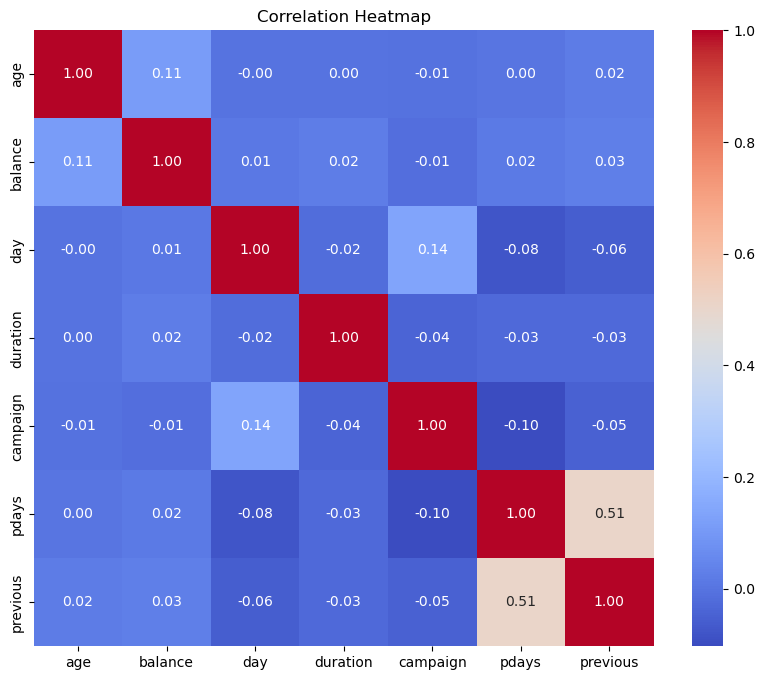

In [3]:
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')  # Add title if needed
plt.show()

### Data preprocessing

In [5]:
df.shape

(11162, 17)

##

** target feature is given- supervised learning
** TV is catagorical- it will used a supervised classification algorithm

#### Important
** When we do our EDA, and when we look at the heat map and realize that
   there is high multicolinearity present in the data. remember you cannot
   any distence based algorithm easily. You will be bound to use algorithms
   like  decision tree, random forest etc which are non distence based.

In [14]:
# take the dataset and for each one of them apply lable encoder.
# it will automatically find how many catagories are there and assign them
# lables.(like -0,1,2,3 etc)

def preprocessor(df):
    res_df=df.copy()
    le=preprocessing.LabelEncoder()
    
    res_df['job']=le.fit_transform(res_df['job'])
    res_df['marital']=le.fit_transform(res_df['marital'])
    res_df['education']=le.fit_transform(res_df['education'])
    res_df['default']=le.fit_transform(res_df['default'])
    res_df['housing']=le.fit_transform(res_df['housing'])
    res_df['loan']=le.fit_transform(res_df['loan'])
    res_df['contact']=le.fit_transform(res_df['contact'])
    res_df['month']=le.fit_transform(res_df['month'])
    res_df['poutcome']=le.fit_transform(res_df['poutcome'])
    res_df['deposit']=le.fit_transform(res_df['deposit'])
    return res_df

#get_dummies (read documentation, train and test dataset)
    

In [15]:
encoded_df=preprocessor(df)
encoded_df.head(5)
# all the catagorical variables converted into numerical variable.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


#### Spreading x and y

In [16]:
x=encoded_df.drop('deposit',axis=1).values
y=encoded_df['deposit'].values
X_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=5)

In [18]:
x.shape

(11162, 16)

In [19]:
y.shape

(11162,)

In [20]:
X_train.shape

(8929, 16)

In [21]:
x_test.shape

(2233, 16)

## Decision tree with Cart(GINI)

###### Decision tree with depth 4

In [29]:
# all classification models are instantiate with some random_state
# bcoz there is random reshufling of the data within the model algorithm also
model_dt_4=DecisionTreeClassifier(random_state=1,max_depth=4)
model_dt_4.fit(X_train,y_train)
# model creation: it will learn from the training data

y_pred_4=model_dt_4.predict(x_test)
# to test model use model.predict(x_test)
accuracy_score_4=accuracy_score(y_test,y_pred_4)
print('Accuracy score for model eith depth 4 is:',accuracy_score_4)

Accuracy score for model eith depth 4 is: 0.7913121361397224


#### Decision tree with depth 6

In [30]:
model_dt_6=DecisionTreeClassifier(random_state=1,max_depth=6)
model_dt_6.fit(X_train,y_train)

y_pred_6=model_dt_6.predict(x_test)
accuracy_score_6=accuracy_score(y_test,y_pred_6)
print('Accuracy score for model eith depth 6 is:',accuracy_score_6)

Accuracy score for model eith depth 6 is: 0.8083296014330497


#### Decision tree with dept 8

In [31]:
model_dt_8=DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(X_train,y_train)

y_pred_8=model_dt_8.predict(x_test)
accuracy_score_8=accuracy_score(y_test,y_pred_8)
print('Accuracy score for model eith depth 8 is:',accuracy_score_8)

Accuracy score for model eith depth 8 is: 0.8172861621137483


#### Decision tree with c4.5(entropy)

In [33]:
model_dt_entropy=DecisionTreeClassifier(random_state=1,max_depth=8, criterion='entropy')
model_dt_entropy.fit(X_train,y_train)

y_pred_entropy=model_dt_entropy.predict(x_test)
accuracy_score_entropy=accuracy_score(y_test,y_pred_entropy)
print('Accuracy score for model c4.5(entropy) is:',accuracy_score_entropy)

Accuracy score for model c4.5(entropy) is: 0.8119122257053292


### Classification report

In [34]:
print(classification_report(y_test,y_pred_8))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1170
           1       0.79      0.84      0.81      1063

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



#### Area under the curve

In [39]:
# find AUC using y_pred
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_8) # _=threshold
roc_auc_dt=auc(fpr_dt,tpr_dt)
print(roc_auc_dt)

# print(accuracy_score(y_test,y_pred_8))

0.8182852111826712


In [40]:
# find AUC using y_pred_probability
y_pred_proba=model_dt_entropy.predict_proba(x_test)
fpr_dt,tpr_dt,_=roc_curve(y_test,y_pred_proba[:,1])
roc_auc_dt=auc(fpr_dt,tpr_dt)
print(roc_auc_dt)

# print(accuracy_score(y_test,y_pred_8))

0.8688408069405247


#### Graphical representation of tree

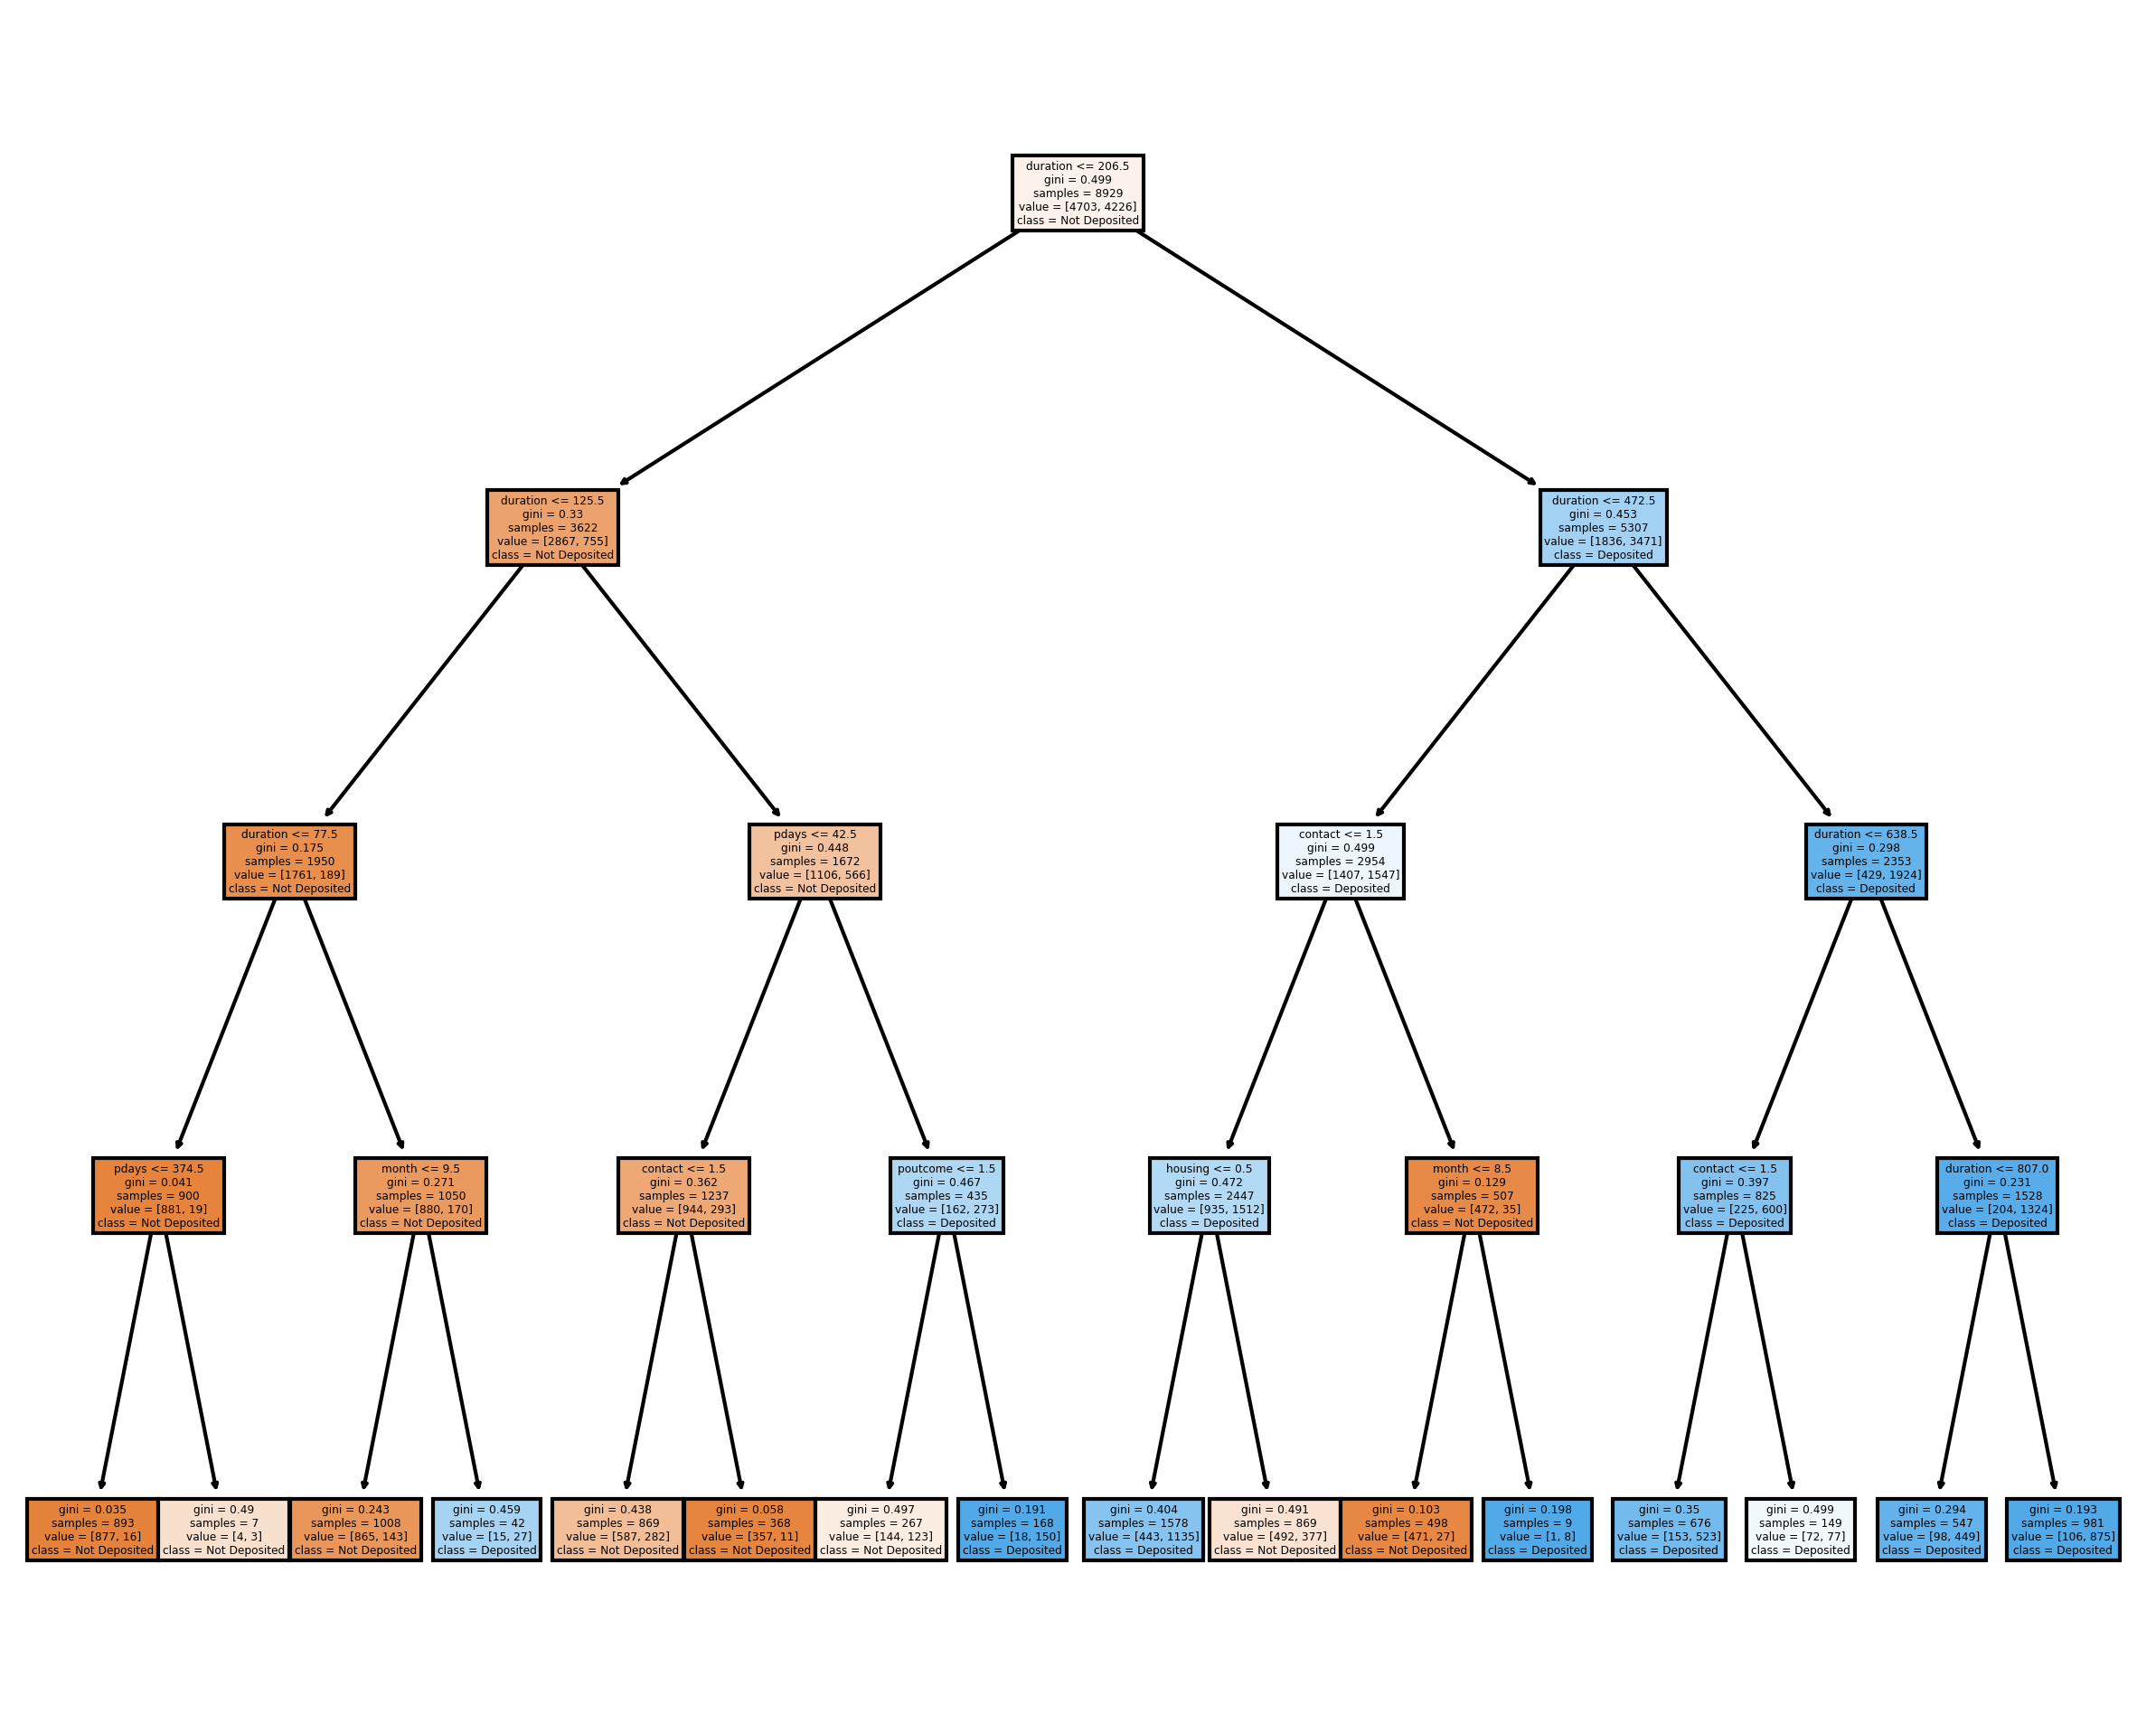

In [44]:
from sklearn import tree
df1=pd.DataFrame(df.drop(['deposit'],axis=1)) # all predictor features
column_names=list(df1.columns) 
fn=column_names # list of features to be splitted
cn=['Not Deposited', 'Deposited'] # class names,catagories of TV

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,8),dpi=300)

tree.plot_tree(model_dt_4,
              feature_names=fn,
              class_names=cn,
              filled=True)

fig.savefig('DecisionTreeComplete.png')

### Explainantion
** It takes "duration" as a first node to split based on the GINI value.
   means it GINI value for "duration" is grater than all other features.
** it takes average of "duration"=206.5 and split it into two which is
    greater then 206.5 and less than 206.5 class.
**  similar process followed by the other nodes.
** 4703 record having target varaiable- NOT DEPOSITED
   4226 record having target varaiable- DEPOSITED